# End of Bootcamp Project 💪🏼

##### Purpose : 
    From my dataset, my goal is to use K-means to create clusters and thus segments in my customer database.

### Importing libraries

In [147]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

### Load the dataset

In [148]:
data = pd.read_csv('/Users/martinez/Downloads/final_project/data_clean - Feuille 1.csv')
display(data)

,id_customer,newsletter_optin,country,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered
0,17,0,France,1,43,30,1305
1,22,0,France,0,5,7,48
2,30,0,France,1,6,14,65
3,31,0,France,1,2,2,17
4,34,0,France,1,1,1,2
...,...,...,...,...,...,...,...
702,2307,0,Espagne,0,1,1,2
703,2310,1,Croatie,1,1,9,9
704,2312,0,France,1,1,2,12
705,2316,0,France,1,1,2,12


### Explore the dataset (shape, null values, describe,...)

In [149]:
data.shape

(707, 7)

In [150]:
data.isnull().sum()

id_customer                 0
newsletter_optin            0
country                     0
order_autonomy              0
number_order                0
number_ref_ordered          0
quantity_product_ordered    0
dtype: int64

In [151]:
data.dtypes

id_customer                  int64
newsletter_optin             int64
country                     object
order_autonomy               int64
number_order                 int64
number_ref_ordered           int64
quantity_product_ordered     int64
dtype: object

In [152]:
data.describe()

,id_customer,newsletter_optin,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,1195.015559,0.195191,0.801980,4.401697,7.858557,632.575672
std,689.230641,0.396628,0.398789,13.480440,9.854311,11476.778849
min,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,549.500000,0.000000,1.000000,1.000000,2.000000,6.000000
50%,1189.000000,0.000000,1.000000,2.000000,5.000000,20.000000
75%,1811.500000,0.000000,1.000000,4.000000,10.000000,83.000000
max,2317.000000,1.000000,1.000000,304.000000,88.000000,303517.000000


### Set Id Customer as index

In [153]:
data = data.set_index(data['id_customer'])
data

,id_customer,newsletter_optin,country,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered
id_customer,,,,,,,
17,17,0,France,1,43,30,1305
22,22,0,France,0,5,7,48
30,30,0,France,1,6,14,65
31,31,0,France,1,2,2,17
34,34,0,France,1,1,1,2
...,...,...,...,...,...,...,...
2307,2307,0,Espagne,0,1,1,2
2310,2310,1,Croatie,1,1,9,9
2312,2312,0,France,1,1,2,12


In [154]:
data = data.drop(columns=['id_customer'])
data

,newsletter_optin,country,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered
id_customer,,,,,,
17,0,France,1,43,30,1305
22,0,France,0,5,7,48
30,0,France,1,6,14,65
31,0,France,1,2,2,17
34,0,France,1,1,1,2
...,...,...,...,...,...,...
2307,0,Espagne,0,1,1,2
2310,1,Croatie,1,1,9,9
2312,0,France,1,1,2,12


### Separate categoricals and numericals columns

In [155]:
categoricals = data.select_dtypes(np.object)
categoricals

,country
id_customer,
17,France
22,France
30,France
31,France
34,France
...,...
2307,Espagne
2310,Croatie
2312,France


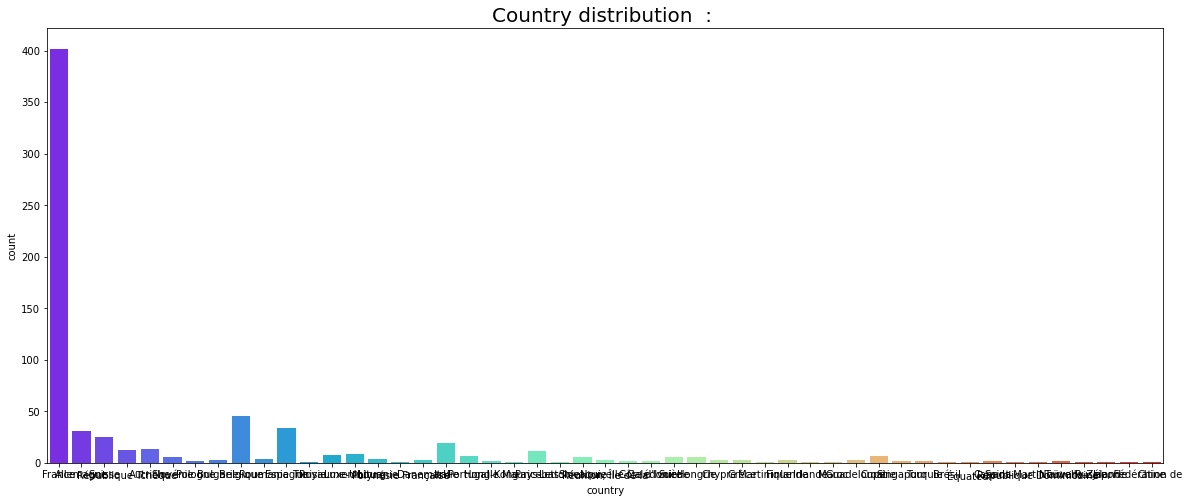

In [156]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(categoricals['country'], palette = 'rainbow')
plt.title('Country distribution  : ', fontsize = 20)
plt.show()

In [157]:
numericals = data.select_dtypes(np.number)
numericals.head()

,newsletter_optin,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered
id_customer,,,,,
17,0,1,43,30,1305
22,0,0,5,7,48
30,0,1,6,14,65
31,0,1,2,2,17
34,0,1,1,1,2


##### Data Visualization

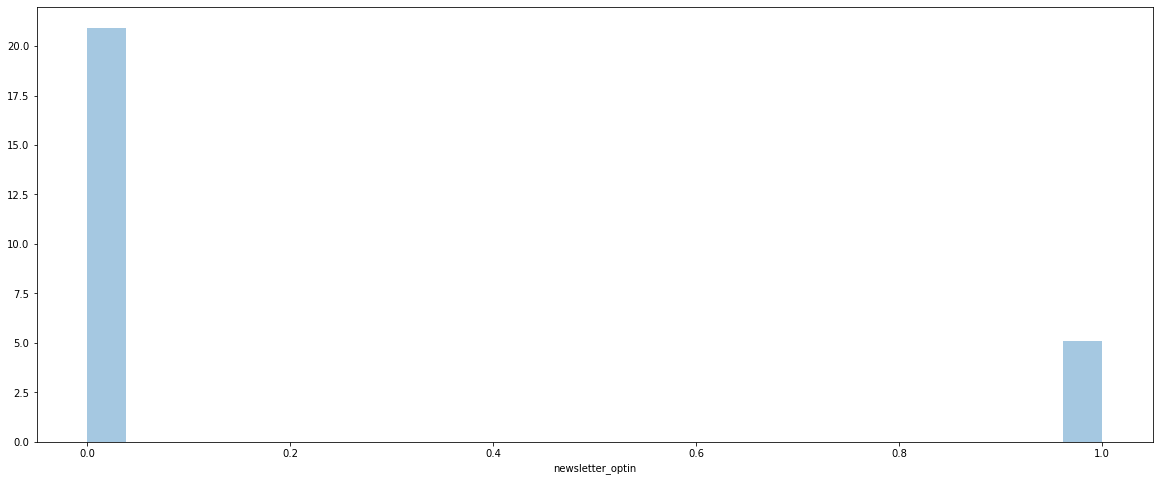

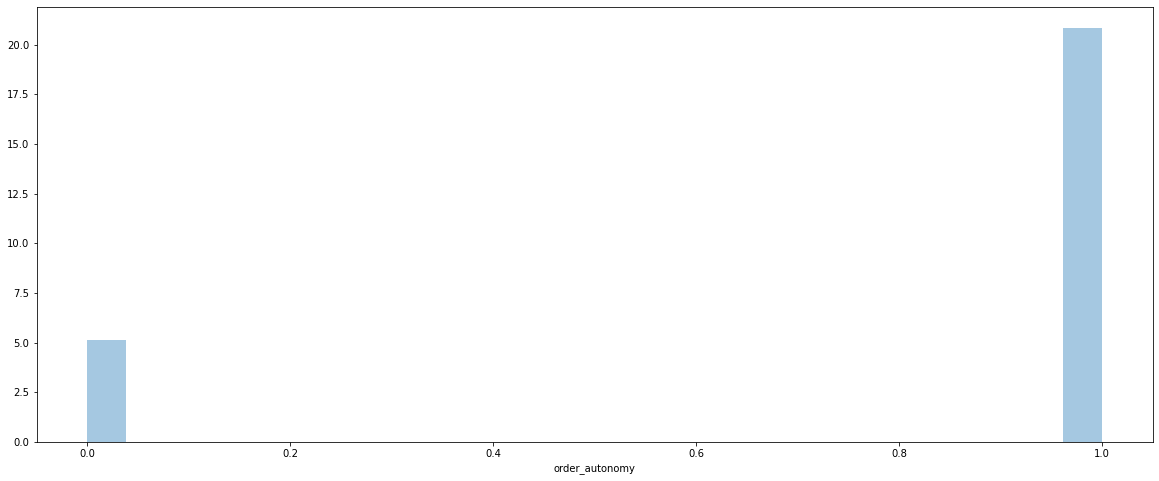

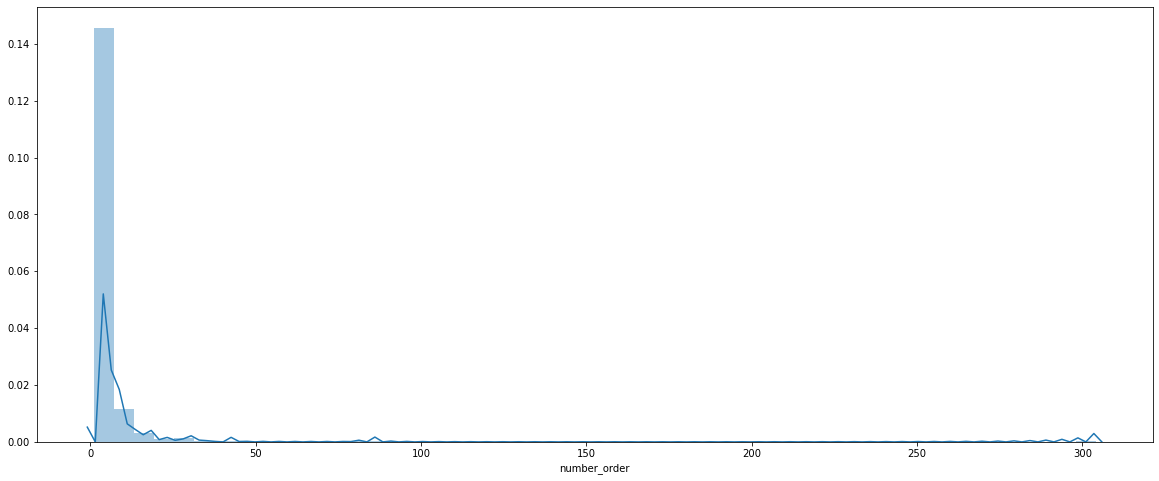

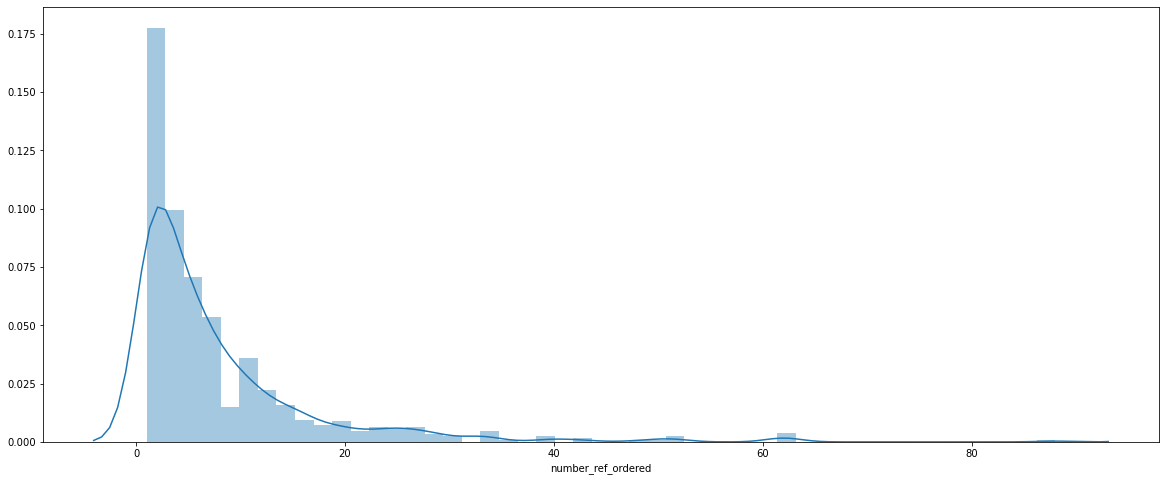

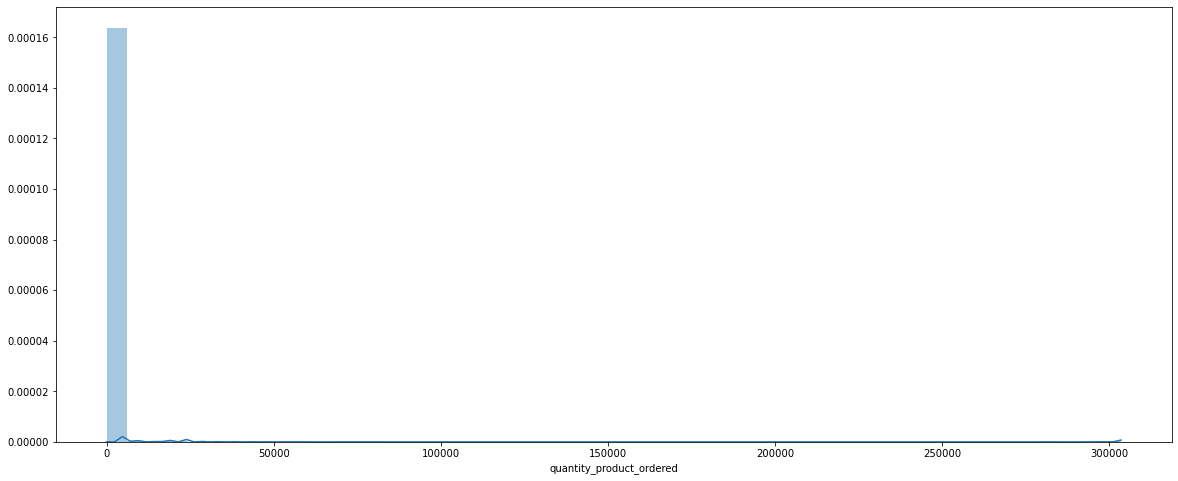

In [158]:
for i in list(numericals.columns):
    sns.distplot(numericals[i])
    plt.show()

###### Correlation Matrix

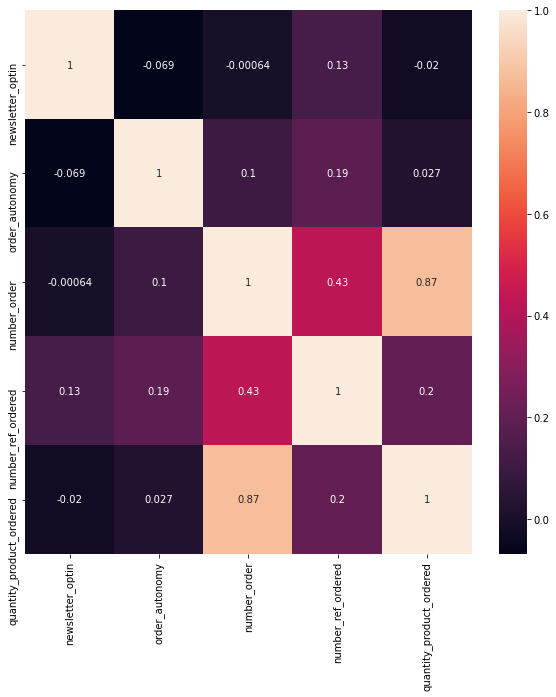

In [159]:
corr_matrix=numericals.corr(method='pearson') # default
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Dummify my categorical columns

In [160]:
categorical_cols = categoricals.columns
categorical_dummies = pd.get_dummies(categoricals, columns = categorical_cols, drop_first = True)
categorical_dummies

,country_Autriche,country_Belgique,country_Brésil,country_Bulgarie,country_Canada,country_Chine,country_Chypre,country_Croatie,country_Côte d'Ivoire,country_Danemark,country_Espagne,country_Finlande,country_France,country_Grèce,country_Guadeloupe,country_Hong-Kong,country_Hongrie,country_Ile Maurice,country_Irlande,country_Italie,country_Japon,country_Lettonie,country_Lituanie,country_Luxembourg,country_Maroc,country_Martinique,country_Nouvelle-Calédonie,country_Nouvelle-Zélande,country_Pays-bas,country_Pologne,country_Polynésie Française,country_Portugal,country_Roumanie,country_Royaume-Uni,"country_Russie, Fédération de",country_République Dominicaine,country_République Tchèque,"country_Réunion, Île de la",country_Saint-Martin,country_Singapour,country_Slovaquie,country_Slovénie,country_Suisse,country_Suède,country_Taïwan,country_Tunisie,country_Turquie,country_Équateur
id_customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2310,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2312,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Merge to obtain the final numerical dataset

In [161]:
X = pd.concat([numericals,categorical_dummies],join = 'inner',axis =1)
X

,newsletter_optin,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered,country_Autriche,country_Belgique,country_Brésil,country_Bulgarie,country_Canada,country_Chine,country_Chypre,country_Croatie,country_Côte d'Ivoire,country_Danemark,country_Espagne,country_Finlande,country_France,country_Grèce,country_Guadeloupe,country_Hong-Kong,country_Hongrie,country_Ile Maurice,country_Irlande,country_Italie,country_Japon,country_Lettonie,country_Lituanie,country_Luxembourg,country_Maroc,country_Martinique,country_Nouvelle-Calédonie,country_Nouvelle-Zélande,country_Pays-bas,country_Pologne,country_Polynésie Française,country_Portugal,country_Roumanie,country_Royaume-Uni,"country_Russie, Fédération de",country_République Dominicaine,country_République Tchèque,"country_Réunion, Île de la",country_Saint-Martin,country_Singapour,country_Slovaquie,country_Slovénie,country_Suisse,country_Suède,country_Taïwan,country_Tunisie,country_Turquie,country_Équateur
id_customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17,0,1,43,30,1305,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,5,7,48,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,0,1,6,14,65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0,1,2,2,17,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2310,1,1,1,9,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2312,0,1,1,2,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scaling features

In [162]:
X.describe()

,newsletter_optin,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered,country_Autriche,country_Belgique,country_Brésil,country_Bulgarie,country_Canada,country_Chine,country_Chypre,country_Croatie,country_Côte d'Ivoire,country_Danemark,country_Espagne,country_Finlande,country_France,country_Grèce,country_Guadeloupe,country_Hong-Kong,country_Hongrie,country_Ile Maurice,country_Irlande,country_Italie,country_Japon,country_Lettonie,country_Lituanie,country_Luxembourg,country_Maroc,country_Martinique,country_Nouvelle-Calédonie,country_Nouvelle-Zélande,country_Pays-bas,country_Pologne,country_Polynésie Française,country_Portugal,country_Roumanie,country_Royaume-Uni,"country_Russie, Fédération de",country_République Dominicaine,country_République Tchèque,"country_Réunion, Île de la",country_Saint-Martin,country_Singapour,country_Slovaquie,country_Slovénie,country_Suisse,country_Suède,country_Taïwan,country_Tunisie,country_Turquie,country_Équateur
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,0.195191,0.801980,4.401697,7.858557,632.575672,0.018388,0.063649,0.001414,0.004243,0.002829,0.001414,0.004243,0.009901,0.002829,0.004243,0.048091,0.004243,0.568600,0.004243,0.004243,0.002829,0.008487,0.001414,0.001414,0.026874,0.001414,0.001414,0.005658,0.012730,0.001414,0.001414,0.002829,0.001414,0.015559,0.002829,0.001414,0.009901,0.005658,0.011315,0.001414,0.001414,0.016973,0.004243,0.001414,0.002829,0.008487,0.008487,0.035361,0.008487,0.002829,0.001414,0.002829,0.001414
std,0.396628,0.398789,13.480440,9.854311,11476.778849,0.134443,0.244300,0.037609,0.065048,0.053149,0.037609,0.065048,0.099080,0.053149,0.065048,0.214109,0.065048,0.495622,0.065048,0.065048,0.053149,0.091796,0.037609,0.037609,0.161830,0.037609,0.037609,0.075058,0.112186,0.037609,0.037609,0.053149,0.037609,0.123848,0.053149,0.037609,0.099080,0.075058,0.105845,0.037609,0.037609,0.129262,0.065048,0.037609,0.053149,0.091796,0.091796,0.184820,0.091796,0.053149,0.037609,0.053149,0.037609
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,4

**K-Means is a distance based algorithm**: we need to scale / normalize!:

In [163]:
X_prep = StandardScaler().fit_transform(X)

In [164]:
pd.DataFrame(X_prep, columns=X.columns).head()

,newsletter_optin,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered,country_Autriche,country_Belgique,country_Brésil,country_Bulgarie,country_Canada,country_Chine,country_Chypre,country_Croatie,country_Côte d'Ivoire,country_Danemark,country_Espagne,country_Finlande,country_France,country_Grèce,country_Guadeloupe,country_Hong-Kong,country_Hongrie,country_Ile Maurice,country_Irlande,country_Italie,country_Japon,country_Lettonie,country_Lituanie,country_Luxembourg,country_Maroc,country_Martinique,country_Nouvelle-Calédonie,country_Nouvelle-Zélande,country_Pays-bas,country_Pologne,country_Polynésie Française,country_Portugal,country_Roumanie,country_Royaume-Uni,"country_Russie, Fédération de",country_République Dominicaine,country_République Tchèque,"country_Réunion, Île de la",country_Saint-Martin,country_Singapour,country_Slovaquie,country_Slovénie,country_Suisse,country_Suède,country_Taïwan,country_Tunisie,country_Turquie,country_Équateur
0,-0.492474,0.496904,2.865309,2.248470,0.058631,-0.136865,-0.260722,-0.037635,-0.065279,-0.053262,-0.037635,-0.065279,-0.1,-0.053262,-0.065279,-0.224767,-0.065279,0.871038,-0.065279,-0.065279,-0.053262,-0.092516,-0.037635,-0.037635,-0.166181,-0.037635,-0.037635,-0.075431,-0.113552,-0.037635,-0.037635,-0.053262,-0.037635,-0.125716,-0.053262,-0.037635,-0.1,-0.075431,-0.106981,-0.037635,-0.037635,-0.131401,-0.065279,-0.037635,-0.053262,-0.092516,-0.092516,-0.19146,-0.092516,-0.053262,-0.037635,-0.053262,-0.037635
1,-0.492474,-2.012461,0.044414,-0.087187,-0.050972,-0.136865,-0.260722,-0.037635,-0.065279,-0.053262,-0.037635,-0.065279,-0.1,-0.053262,-0.065279,-0.224767,-0.065279,0.871038,-0.065279,-0.065279,-0.053262,-0.092516,-0.037635,-0.037635,-0.166181,-0.037635,-0.037635,-0.075431,-0.113552,-0.037635,-0.037635,-0.053262,-0.037635,-0.125716,-0.053262,-0.037635,-0.1,-0.075431,-0.106981,-0.037635,-0.037635,-0.131401,-0.065279,-0.037635,-0.053262,-0.092516,-0.092516,-0.19146,-0.092516,-0.053262,-0.037635,-0.053262,-0.037635
2,-0.492474,0.496904,0.118649,0.623665,-0.049489,-0.136865,-0.260722,-0.037635,-0.065279,-0.053262,-0.037635,-0.065279,-0.1,-0.053262,-0.065279,-0.224767,-0.065279,0.871038,-0.065279,-0.065279,-0.053262,-0.092516,-0.037635,-0.037635,-0.166181,-0.037635,-0.037635,-0.075431,-0.113552,-0.037635,-0.037635,-0.053262,-0.037635,-0.125716,-0.053262,-0.037635,-0.1,-0.075431,-0.106981,-0.037635,-0.037635,-0.131401,-0.065279,-0.037635,-0.053262,-0.092516,-0.092516,-0.19146,-0.092516,-0.053262,-0.037635,-0.053262,-0.037635
3,-0.492474,0.496904,-0.178288,-0.594938,-0.053675,-0.136865,-0.260722,-0.037635,-0.065279,-0.053262,-0.037635,-0.065279,-0.1,-0.053262,-0.065279,-0.224767,-0.065279,0.871038,-0.065279,-0.065279,-0.053262,-0.092516,-0.037635,-0.037635,-0.166181,-0.037635,-0.037635,-0.075431,-0.113552,-0.037635,-0.037635,-0.053262,-0.037635,-0.125716,-0.053262,-0.037635,-0.1,-0.075431,-0.106981,-0.037635,-0.037635,-0.131401,-0.065279,-0.037635,-0.053262,-0.092516,-0.092516,-0.19146,-0.092516,-0.053262,-0.037635,-0.053262,-0.037635
4,-0.492474,0.496904,-0.252522,-0.696488,-0.054983,-0.136865,-0.260722,-0.037635,-0.065279,-0.053262,-0.037635,-0.065279,-0.1,-0.053262,-0.065279,-0.224767,-0.065279,0.871038,-0.065279,-0.065279,-0.053262,-0.092516,-0.037635,-0.037635,-0.166181,-0.037635,-0.037635,-0.075431,-0.113552,-0.037635,-0.037635,-0.053262,-0.037635,-0.125716,-0.053262,-0.037635,-0.1,-0.075431,-0.106981,-0.037635,-0.037635,-0.131401,-0.065279,-0.037635,-0.053262,-0.092516,-0.092516,-0.19146,-0.092516,-0.053262,-0.037635,-0.053262,-0.037635


### Clustering the customers with K-Means

In [165]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=7, random_state=1234)

In [166]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    555
1    139
2      3
3      2
4      1
5      6
6      1
dtype: int64

In [167]:
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

,newsletter_optin,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered,country_Autriche,country_Belgique,country_Brésil,country_Bulgarie,country_Canada,country_Chine,country_Chypre,country_Croatie,country_Côte d'Ivoire,country_Danemark,country_Espagne,country_Finlande,country_France,country_Grèce,country_Guadeloupe,country_Hong-Kong,country_Hongrie,country_Ile Maurice,country_Irlande,country_Italie,country_Japon,country_Lettonie,country_Lituanie,country_Luxembourg,country_Maroc,country_Martinique,country_Nouvelle-Calédonie,country_Nouvelle-Zélande,country_Pays-bas,country_Pologne,country_Polynésie Française,country_Portugal,country_Roumanie,country_Royaume-Uni,"country_Russie, Fédération de",country_République Dominicaine,country_République Tchèque,"country_Réunion, Île de la",country_Saint-Martin,country_Singapour,country_Slovaquie,country_Slovénie,country_Suisse,country_Suède,country_Taïwan,country_Tunisie,country_Turquie,country_Équateur,cluster
id_customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17,0,1,43,30,1305,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,5,7,48,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,0,1,6,14,65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0,1,2,2,17,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Playing with the parameters

In [168]:
kmeans.inertia_

32548.18569835257

In [169]:
kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

32246.694041007766


In [170]:
kmeans = KMeans(n_clusters=10,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

30805.916600232296


In [171]:
kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=20,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

31857.092433837737


### Chosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

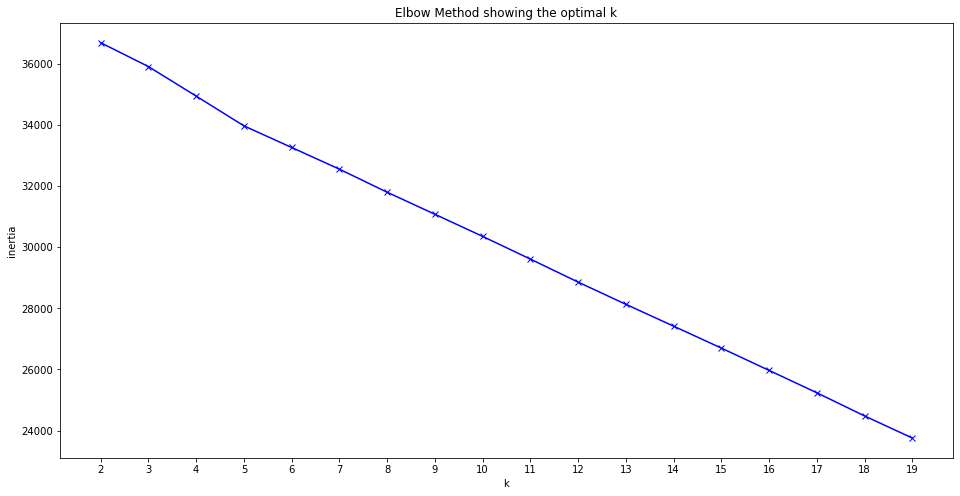

In [172]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silouhette

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

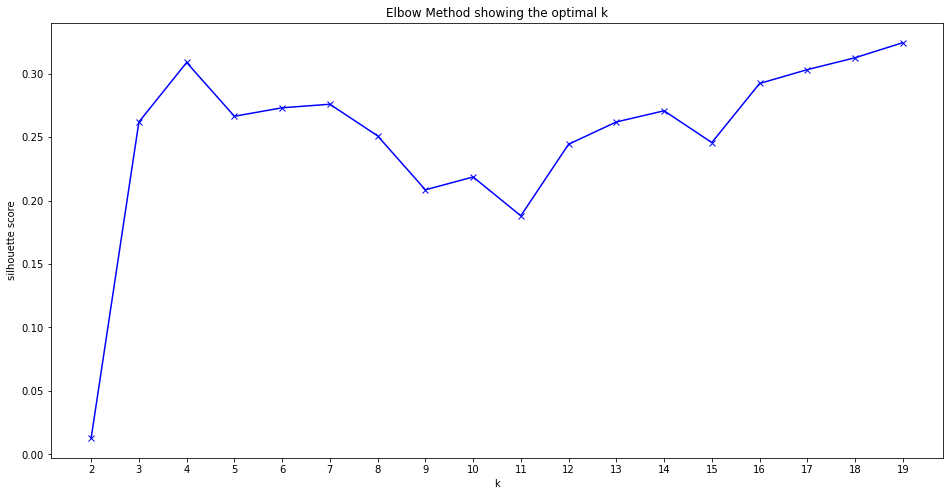

In [173]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [174]:
X_df.to_csv('/Users/martinez/Downloads/final_project/X_df.csv')

### Trying without the column "Country"

In [175]:
numericals.describe()

,newsletter_optin,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered
count,707.000000,707.000000,707.000000,707.000000,707.000000
mean,0.195191,0.801980,4.401697,7.858557,632.575672
std,0.396628,0.398789,13.480440,9.854311,11476.778849
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,2.000000,6.000000
50%,0.000000,1.000000,2.000000,5.000000,20.000000
75%,0.000000,1.000000,4.000000,10.000000,83.000000
max,1.000000,1.000000,304.000000,88.000000,303517.000000


In [176]:
X_prep_2 = StandardScaler().fit_transform(numericals)

In [177]:
pd.DataFrame(X_prep_2, columns=numericals.columns).head()

,newsletter_optin,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered
0,-0.492474,0.496904,2.865309,2.248470,0.058631
1,-0.492474,-2.012461,0.044414,-0.087187,-0.050972
2,-0.492474,0.496904,0.118649,0.623665,-0.049489
3,-0.492474,0.496904,-0.178288,-0.594938,-0.053675
4,-0.492474,0.496904,-0.252522,-0.696488,-0.054983


In [178]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_prep_2)

KMeans(n_clusters=6, random_state=1234)

In [179]:
clusters = kmeans.predict(X_prep_2)
pd.Series(clusters).value_counts().sort_index()

0    105
1    431
2      1
3     45
4     90
5     35
dtype: int64

In [180]:
X_df_2 = pd.DataFrame(numericals)
X_df_2["cluster"] = clusters
X_df_2.head()

,newsletter_optin,order_autonomy,number_order,number_ref_ordered,quantity_product_ordered,cluster
id_customer,,,,,,
17,0,1,43,30,1305,3
22,0,0,5,7,48,0
30,0,1,6,14,65,1
31,0,1,2,2,17,1
34,0,1,1,1,2,1


In [181]:
kmeans.inertia_

478.6888975921338

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

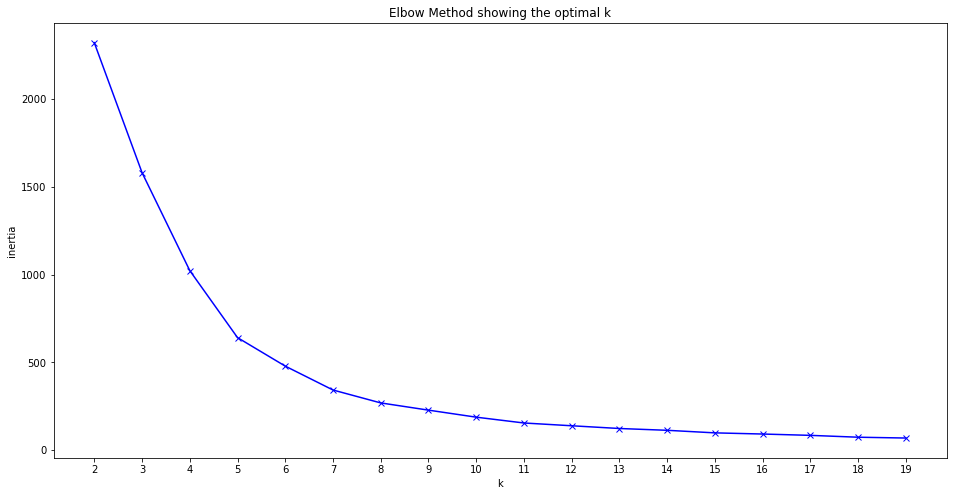

In [182]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep_2)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

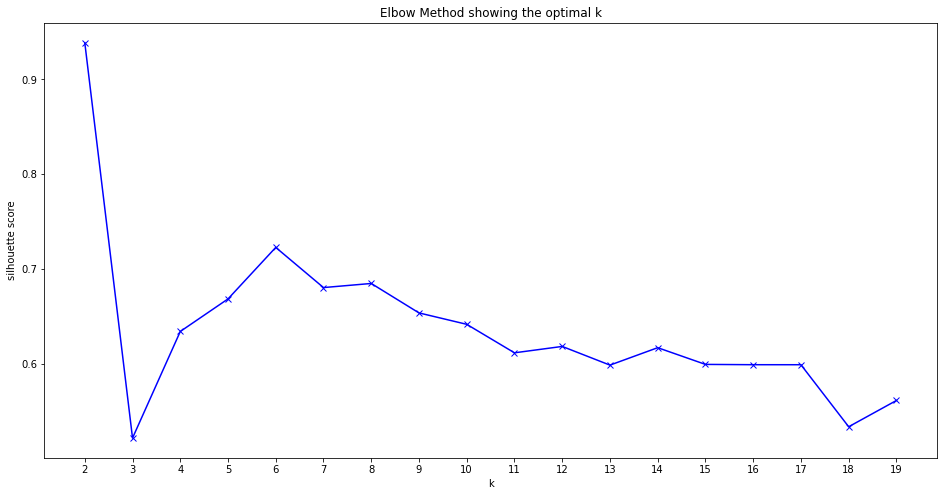

In [183]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep_2)
    silhouette.append(silhouette_score(X_prep_2, kmeans.predict(X_prep_2)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [184]:
X_df_2.to_csv('/Users/martinez/Downloads/final_project/X_df_2.csv')

Better results without the column country, this dataset X_df_2 is my final clustered file. Now, it's time to go back to Tableau to make analysis of these clusters.

##### Cluster Representation

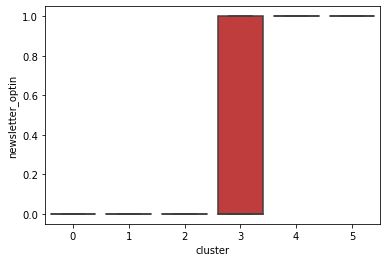

In [185]:
sns.boxplot(x='cluster', y='newsletter_optin', data=X_df_2)

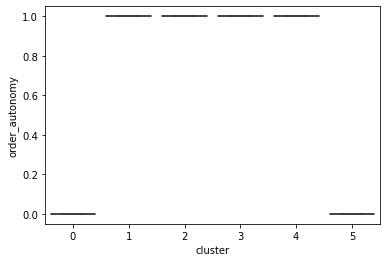

In [186]:
sns.boxplot(x='cluster', y='order_autonomy', data=X_df_2)

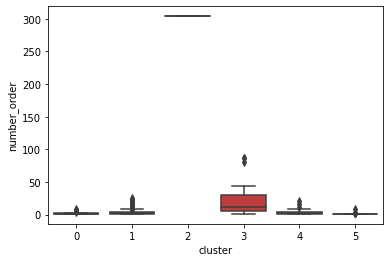

In [187]:
sns.boxplot(x='cluster', y='number_order', data=X_df_2)

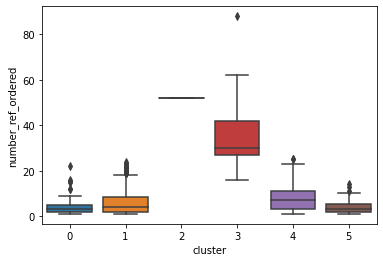

In [188]:
sns.boxplot(x='cluster', y='number_ref_ordered', data=X_df_2)

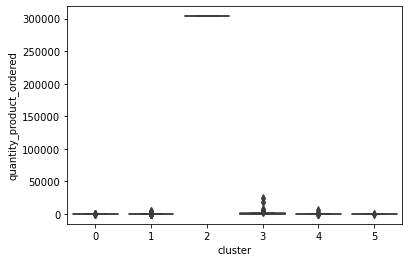

In [189]:
sns.boxplot(x='cluster', y='quantity_product_ordered', data=X_df_2)

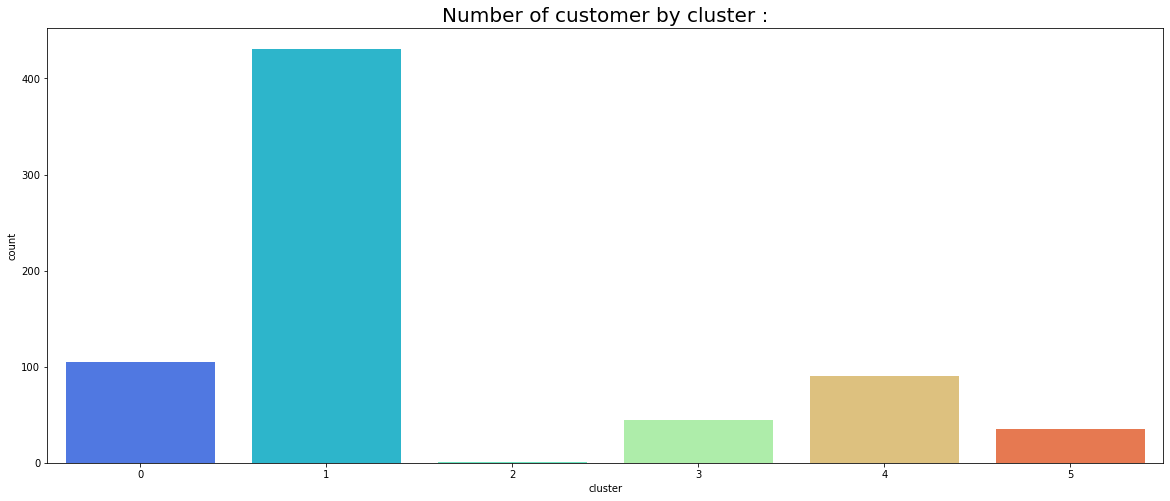

In [190]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(X_df_2['cluster'], palette = 'rainbow')
plt.title('Number of customer by cluster :', fontsize = 20)
plt.show()